In [7]:
#36_01
import tensorflow as tf
import numpy as np
#1: crate a 1D input data
A = np.array([1, 2, 3, 4, 5]).astype('float32')

#2
p = 2
paddings = np.array([[p, p]])

#3
B = tf.pad(A, paddings, "constant")
C = tf.pad(A, paddings, "reflect") # 중간값 기준 양쪽 패딩 - 중간값을 기준으로 반사
D = tf.pad(A, paddings, "symmetric") # 끝값에서 대칭
print("B=", B.numpy())
print("C=", C.numpy())
print("D=", D.numpy())


B= [0. 0. 1. 2. 3. 4. 5. 0. 0.]
C= [3. 2. 1. 2. 3. 4. 5. 4. 3.]
D= [2. 1. 1. 2. 3. 4. 5. 5. 4.]


In [8]:
#36_02
import tensorflow as tf
import numpy as np
#1: 
def pad1d_infor(steps, kernel_size=2, strides=1,
                  dilation_rate=1, padding= 'valid'):   
    k = (kernel_size-1)*dilation_rate + 1
    if padding == 'valid':
        new_steps = int(np.ceil((steps - k + 1) / strides))
        pad_left, pad_right=(0, 0) 
       
    else: # 'same', 'casual'
        new_steps = int(np.ceil(steps/strides))     
        pad_width = max((new_steps  - 1) * strides + k - steps, 0)

        if padding == 'same':   
            pad_left  = pad_width//2
            pad_right = pad_width - pad_left
        if padding =='casual':               
            pad_left  = pad_width
            pad_right = 0
    return k, new_steps, (pad_left, pad_right)

#2: crate a 1D input data
A = np.array([1, 2, 3, 4, 5]).astype('float32')
length = A.shape[0] #len(len), 5
         
#3: padding in MaxPool1D [step37_02]
#3-1: 
new_k, new_steps, pads= pad1d_infor(steps=length, kernel_size=2,
                                      strides=2, padding= 'same')
print("new_k ={}, new_steps={}, pads={}".format(new_k,new_steps,pads))  
B1 = tf.pad(A, paddings=np.array([pads]))
print("B1=", B1.numpy())

#3-2: 
new_k, new_steps, pads= pad1d_infor(steps=length, kernel_size=4,
                                      strides=3, padding= 'same')
print("new_k ={}, new_steps={}, pads={}".format(new_k,new_steps,pads))  
B2 = tf.pad(A, paddings=np.array([pads]))
print("B2=", B2.numpy())

#4: padding in Conv1D
#4-1: 
new_k, new_steps, pads= pad1d_infor(steps=length, kernel_size=3,
                                      padding= 'same')                                
print("new_k ={}, new_steps={}, pads={}".format(new_k,new_steps,pads))  
B3 = tf.pad(A, paddings=np.array([pads]))
print("B3=", B3.numpy())

#4-2: 
new_k, new_steps, pads= pad1d_infor(steps=length, kernel_size=3,
                                      strides=2, padding= 'same')
print("new_k ={}, new_steps={}, pads={}".format(new_k,new_steps,pads))  
B4 = tf.pad(A, paddings=np.array([pads]))
print("B4=", B4.numpy())

#4-3: 
new_k, new_steps, pads= pad1d_infor(steps=length, kernel_size=3,
                                      dilation_rate=1, padding= 'casual')
print("new_k ={}, new_steps={}, pads={}".format(new_k,new_steps,pads))  
B5 = tf.pad(A, paddings=np.array([pads]))
print("B5=", B5.numpy())

#4-4: 
new_k, new_steps, pads= pad1d_infor(steps=length, kernel_size=3,
                                      dilation_rate=2, padding= 'same')
print("new_k ={}, new_steps={}, pads={}".format(new_k,new_steps,pads))  
B6 = tf.pad(A, paddings=np.array([pads]))
print("B6=", B6.numpy())

#4-5: 
new_k, new_steps, pads= pad1d_infor(steps=length, kernel_size=3,
                                      dilation_rate=2, padding= 'casual')
print("new_k ={}, new_steps={}, pads={}".format(new_k,new_steps,pads))  
B7 = tf.pad(A, paddings=np.array([pads]))
print("B7=", B7.numpy())

#4-6: 
new_k, new_steps, pads= pad1d_infor(steps=length, kernel_size=3,
                                      dilation_rate=3, padding= 'casual')
print("new_k ={}, new_steps={}, pads={}".format(new_k,new_steps,pads))  
B8 = tf.pad(A, paddings=np.array([pads]))
print("B8=", B8.numpy())


new_k =2, new_steps=3, pads=(0, 1)
B1= [1. 2. 3. 4. 5. 0.]
new_k =4, new_steps=2, pads=(1, 1)
B2= [0. 1. 2. 3. 4. 5. 0.]
new_k =3, new_steps=5, pads=(1, 1)
B3= [0. 1. 2. 3. 4. 5. 0.]
new_k =3, new_steps=3, pads=(1, 1)
B4= [0. 1. 2. 3. 4. 5. 0.]
new_k =3, new_steps=5, pads=(2, 0)
B5= [0. 0. 1. 2. 3. 4. 5.]
new_k =5, new_steps=5, pads=(2, 2)
B6= [0. 0. 1. 2. 3. 4. 5. 0. 0.]
new_k =5, new_steps=5, pads=(4, 0)
B7= [0. 0. 0. 0. 1. 2. 3. 4. 5.]
new_k =7, new_steps=5, pads=(6, 0)
B8= [0. 0. 0. 0. 0. 0. 1. 2. 3. 4. 5.]


In [3]:
#36_03
import tensorflow as tf
import numpy as np
#1: crate a 2D input data
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]]).astype('float32')
#2
pads = np.array([[1, 1],
                     [2, 2]])
#3
B = tf.pad(A, pads, "constant")
C = tf.pad(A, pads, "reflect")
D = tf.pad(A, pads, "symmetric")
print("B=", B.numpy())
print("C=", C.numpy())
print("D=", D.numpy())


B= [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 2. 3. 0. 0.]
 [0. 0. 4. 5. 6. 0. 0.]
 [0. 0. 7. 8. 9. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
C= [[6. 5. 4. 5. 6. 5. 4.]
 [3. 2. 1. 2. 3. 2. 1.]
 [6. 5. 4. 5. 6. 5. 4.]
 [9. 8. 7. 8. 9. 8. 7.]
 [6. 5. 4. 5. 6. 5. 4.]]
D= [[2. 1. 1. 2. 3. 3. 2.]
 [2. 1. 1. 2. 3. 3. 2.]
 [5. 4. 4. 5. 6. 6. 5.]
 [8. 7. 7. 8. 9. 9. 8.]
 [8. 7. 7. 8. 9. 9. 8.]]


In [12]:
#36_04
import tensorflow as tf
import numpy as np
#1 
def pad2d_infor(input_shape, kernel_size=(2,2), strides=(1,1),
                    dilation_rate=(1,1), padding= 'valid'):
    rows, cols = input_shape
    kH = (kernel_size[0]-1)*dilation_rate[0] + 1
    kW = (kernel_size[1]-1)*dilation_rate[1] + 1

    if padding == 'valid':
        new_rows = int(np.ceil((input_shape[0]-kH+1)/strides[0]))
        new_cols = int(np.ceil((input_shape[1]-kW+1)/strides[1]))
        pad_left, pad_right, pad_top, pad_bottom=(0, 0, 0, 0) 
       
    else: # 'same'
        new_rows = int(np.ceil(input_shape[0]/strides[0]))
        new_cols = int(np.ceil(input_shape[1]/strides[1]))
        
        pad_height = max((new_rows-1)*strides[0] + kH - input_shape[0], 0)       
        pad_width  = max((new_cols-1)*strides[1] + kW - input_shape[1], 0)

        pad_top    = pad_height//2
        pad_bottom = pad_height - pad_top    
        pad_left  = pad_width//2
        pad_right = pad_width - pad_left
    return (kH,kW),(new_rows,new_cols),[[pad_left,pad_right],[pad_top,pad_bottom]]

#2: crate a 2D input data
A = np.array([[1, 2, 3, 4, 5],
              [4, 3, 2, 1, 0],
              [5, 6, 7, 8, 9],
              [4, 3, 2, 1, 0],
              [0, 1, 2, 3, 4]],dtype='float32')
         
#3: padding in 2D
#3-1: 
new_k, new_shape, pads= pad2d_infor(input_shape=A.shape,
                                      kernel_size=(2,2), strides=(2,2), padding= 'valid')
print("new_k ={}, new_shape={}, pads={}".format(new_k, new_shape, pads))  
B1 = tf.pad(A, paddings=np.array(pads))
print("B1=", B1.numpy())

#3-2:
new_k, new_shape, pads= pad2d_infor(input_shape=A.shape,
                         kernel_size=(2,2), strides=(2,2), padding= 'same')
print("new_k ={}, new_shape={}, pads={}".format(new_k, new_shape, pads))  
B2 = tf.pad(A, paddings=np.array(pads))
print("B2=", B2.numpy())



new_k =(2, 2), new_shape=(2, 2), pads=[[0, 0], [0, 0]]
B1= [[1. 2. 3. 4. 5.]
 [4. 3. 2. 1. 0.]
 [5. 6. 7. 8. 9.]
 [4. 3. 2. 1. 0.]
 [0. 1. 2. 3. 4.]]
new_k =(2, 2), new_shape=(3, 3), pads=[[0, 1], [0, 1]]
B2= [[1. 2. 3. 4. 5. 0.]
 [4. 3. 2. 1. 0. 0.]
 [5. 6. 7. 8. 9. 0.]
 [4. 3. 2. 1. 0. 0.]
 [0. 1. 2. 3. 4. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [13]:
#36_05
import tensorflow as tf
import numpy as np
 
#1: crate a 1D input data with 3-channels
A = np.array([1, 2, 3, 4, 5]).astype('float32')
A = np.reshape(A, (1, -1, 1)) # (batch, steps, channels)
 
#2: build a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=A.shape[1:]))  # shape=(5, 1)
model.add(tf.keras.layers.ZeroPadding1D(padding=(1, 2)))
model.summary()

#3: apply A to model
output = model(A)
print("type(output) =", type(output))
print("output.numpy()=", output.numpy())

#4: apply A to model
output2 = model.predict(A)
print("type(output2) =", type(output2))
print("output2=", output2)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding1d_1 (ZeroPaddi  (None, 8, 1)             0         
 ng1D)                                                           
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
type(output) = <class 'tensorflow.python.framework.ops.EagerTensor'>
output.numpy()= [[[0.]
  [1.]
  [2.]
  [3.]
  [4.]
  [5.]
  [0.]
  [0.]]]
1/1 [==============================] - 0s 47ms/step
type(output2) = <class 'numpy.ndarray'>
output2= [[[0.]
  [1.]
  [2.]
  [3.]
  [4.]
  [5.]
  [0.]
  [0.]]]


In [14]:
#36_06
import tensorflow as tf
import numpy as np
 
#1: crate a 2D input data
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]]).astype('float32')
A = A.reshape(-1, 3, 3, 1)  # (batch, rows, cols, channels)
 
#2: build a model
pads = np.array([[1, 1],  # rows: (left, right) padding
                [2, 2]])  # cols: (top, bottom) padding 
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=A.shape[1:]))  # (3,3,1)
model.add(tf.keras.layers.ZeroPadding2D(padding=pads))
model.summary()

#3: apply A to model
output = model(A)
print("output.shape=", output.shape)
print("output.numpy()=", output.numpy())

#4: apply A to model
output2 = model.predict(A)
print("output2.shape=", output2.shape)
print("output2=", output2)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_1 (ZeroPaddi  (None, 5, 7, 1)          0         
 ng2D)                                                           
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
output.shape= (1, 5, 7, 1)
output.numpy()= [[[[0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [1.]
   [2.]
   [3.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [4.]
   [5.]
   [6.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [7.]
   [8.]
   [9.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]]]]
1/1 [==============================] - 0s 46ms/step
output2.shape= (1, 5, 7, 1)
output2= [[[[0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [1.]
   [2.]
   [3.]
 

In [16]:
#37_01
import tensorflow as tf
import numpy as np

#1: GPU 메모리할당오류, [그림 2.9] 참조
#ref:https://www.tensorflow.org/guide/gpu

#gpus = tf.config.experimental.list_physical_devices('GPU')
#if gpus:
#    for gpu in gpus:
#        tf.config.experimental.set_memory_growth(gpu,True)
#else:
#    print("No GPU found")
    
#tf.config.experimental.set_memory_growth(gpus[0], True)
#tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])

#2    
# crate a 1D input data
A = np.array([1, 2, 3, 4, 5]).astype('float32')

#3: calculate output size in padding = "valid"
k = 2           # pool_size, kernel_size
s = 2           # slides
n = len(A)      # input_size
output_size= int(np.ceil((n - k + 1) / s))
print("output_size = ", output_size)      # len(B)

#4: build a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = (5, 1)))
model.add(tf.keras.layers.MaxPool1D())               # k = 2, s = 2
##model.add(tf.keras.layers.MaxPool1D(strides = 1) ) # k = 2, s = 1
##model.add(tf.keras.layers.Flatten())      # (batch, downsampled_steps * channels)
model.summary()

#5: apply A to model
A = np.reshape(A, (1, 5, 1))     # (batch, steps, channels)
output = model.predict(A)        # (batch, downsampled_steps, channels)
B = output.flatten()
print("B=", B)


output_size =  2
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling1d_1 (MaxPooling  (None, 2, 1)             0         
 1D)                                                             
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


UnimplementedError: Graph execution error:

Detected at node 'sequential_5/max_pooling1d_1/MaxPool' defined at (most recent call last):
    File "C:\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "D:\tensorflow\venv\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "D:\tensorflow\venv\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "D:\tensorflow\venv\lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "D:\tensorflow\venv\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Python310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Python310\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "C:\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "D:\tensorflow\venv\lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "D:\tensorflow\venv\lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "D:\tensorflow\venv\lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "D:\tensorflow\venv\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "D:\tensorflow\venv\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "D:\tensorflow\venv\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "D:\tensorflow\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "D:\tensorflow\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "D:\tensorflow\venv\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "D:\tensorflow\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "D:\tensorflow\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "D:\tensorflow\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\SW\AppData\Local\Temp\ipykernel_13376\97187033.py", line 39, in <module>
      output = model.predict(A)        # (batch, downsampled_steps, channels)
    File "D:\tensorflow\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\tensorflow\venv\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "D:\tensorflow\venv\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "D:\tensorflow\venv\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\tensorflow\venv\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "D:\tensorflow\venv\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "D:\tensorflow\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\tensorflow\venv\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "D:\tensorflow\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\tensorflow\venv\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "D:\tensorflow\venv\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "D:\tensorflow\venv\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "D:\tensorflow\venv\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "D:\tensorflow\venv\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "D:\tensorflow\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\tensorflow\venv\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "D:\tensorflow\venv\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "D:\tensorflow\venv\lib\site-packages\keras\layers\pooling\base_pooling1d.py", line 76, in call
      outputs = self.pool_function(
    File "D:\tensorflow\venv\lib\site-packages\keras\backend.py", line 6493, in pool2d
      x = tf.compat.v1.nn.max_pool(
Node: 'sequential_5/max_pooling1d_1/MaxPool'
DNN library is not found.
	 [[{{node sequential_5/max_pooling1d_1/MaxPool}}]] [Op:__inference_predict_function_658]

In [17]:
#37_02
import tensorflow as tf
import numpy as np

#1
#gpus = tf.config.experimental.list_physical_devices('GPU')
#if gpus:
#    for gpu in gpus:
#        tf.config.experimental.set_memory_growth(gpu,True)
#else:
#    print("No GPU found")
#tf.config.experimental.set_memory_growth(gpus[0], True)

#2: crate a 1D input data
A = np.array([1, 2, 3, 4, 5]).astype('float32')

#3: calculate padding and output size(new_steps)
k = 2      # pool_size, kernel_size
s = 2      # slides
n = len(A) # input_size

# the same as pad1d_infor(padding="same")
new_steps = int(np.ceil(n/s))
print("new_steps = ", new_steps)

pad_width	= max((new_steps - 1) * s + k - n, 0)
pad_left	= pad_width // 2
pad_right	= pad_width - pad_left
print("pad_left = %s, pad_right=%s"%(pad_left, pad_right))

paddings = np.array([[pad_left, pad_right]])
B = tf.pad(A, paddings, "symmetric")
print("B=", B)

#4: build a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = (5, 1)))
model.add(tf.keras.layers.MaxPool1D(pool_size = k, strides =s, padding="same"))
model.summary()

#5: apply A to model
A = np.reshape(A, (1, 5, 1)) # (batch, steps, channels)
output = model.predict(A) # (batch, downsampled_steps, channels)
C = output.flatten()
print("C=", C)


new_steps =  3
pad_left = 0, pad_right=1
B= tf.Tensor([1. 2. 3. 4. 5. 5.], shape=(6,), dtype=float32)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling1d_2 (MaxPooling  (None, 3, 1)             0         
 1D)                                                             
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


UnimplementedError: Graph execution error:

Detected at node 'sequential_6/max_pooling1d_2/MaxPool' defined at (most recent call last):
    File "C:\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "D:\tensorflow\venv\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "D:\tensorflow\venv\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "D:\tensorflow\venv\lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "D:\tensorflow\venv\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Python310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Python310\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "C:\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "D:\tensorflow\venv\lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "D:\tensorflow\venv\lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "D:\tensorflow\venv\lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "D:\tensorflow\venv\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "D:\tensorflow\venv\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "D:\tensorflow\venv\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "D:\tensorflow\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "D:\tensorflow\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "D:\tensorflow\venv\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "D:\tensorflow\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "D:\tensorflow\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "D:\tensorflow\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\SW\AppData\Local\Temp\ipykernel_13376\1133258921.py", line 43, in <module>
      output = model.predict(A) # (batch, downsampled_steps, channels)
    File "D:\tensorflow\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\tensorflow\venv\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "D:\tensorflow\venv\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "D:\tensorflow\venv\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\tensorflow\venv\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "D:\tensorflow\venv\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "D:\tensorflow\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\tensorflow\venv\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "D:\tensorflow\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\tensorflow\venv\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "D:\tensorflow\venv\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "D:\tensorflow\venv\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "D:\tensorflow\venv\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "D:\tensorflow\venv\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "D:\tensorflow\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\tensorflow\venv\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "D:\tensorflow\venv\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "D:\tensorflow\venv\lib\site-packages\keras\layers\pooling\base_pooling1d.py", line 76, in call
      outputs = self.pool_function(
    File "D:\tensorflow\venv\lib\site-packages\keras\backend.py", line 6493, in pool2d
      x = tf.compat.v1.nn.max_pool(
Node: 'sequential_6/max_pooling1d_2/MaxPool'
DNN library is not found.
	 [[{{node sequential_6/max_pooling1d_2/MaxPool}}]] [Op:__inference_predict_function_752]

In [13]:
#37_03
import tensorflow as tf
import numpy as np

#1
#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)
#if gpus:
#    for gpu in gpus:
#        tf.config.experimental.set_memory_growth(gpu,True)
#else:
#    print("No GPU found")
#2: crate a 1D input data
A = np.array([1, 2, 3, 4, 5]).astype('float32')

#3: calculate output size in padding="valid"
k = 2      # pool_size, kernel_size
s = 2      # slides
n = len(A) # input_size
# the same as pad1d_infor(padding="valid")
new_steps= int(np.ceil((n - k + 1) / s))
print("new_steps = ", new_steps) # len(B)

#4: build a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(5, 1)))
model.add(tf.keras.layers.AveragePooling1D(pool_size=k, strides =s)) 
model.summary()

#5: apply A to model
A = np.reshape(A, (1, 5, 1)) # (batch, steps, channels)
output = model.predict(A)    # (batch, downsampled_steps, channels)
B = output.flatten()
print("B=", B)


new_steps =  2
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 average_pooling1d (AverageP  (None, 2, 1)             0         
 ooling1D)                                                       
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 37ms/step
B= [1.5 3.5]


In [14]:
#37_04
import tensorflow as tf
import numpy as np

#1
#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)
#if gpus:
#    for gpu in gpus:
#        tf.config.experimental.set_memory_growth(gpu,True)
#else:
#    print("No GPU found")
#2: crate a 1D input data
A = np.array([1, 2, 3, 4, 5]).astype('float32')

#3: calculate padding and output size(new_steps)
k = 2      # pool_size, kernel_size
s = 2      # slides
n = len(A) # input_size

# the same as pad1d_infor(padding="same")
new_steps = int(np.ceil(n/s))
print("new_steps  = ", new_steps ) # len(C)

pad_width	= max((new_steps - 1) * s + k - n, 0)
pad_left	= pad_width // 2
pad_right	= pad_width - pad_left
print("pad_left = %s, pad_right=%s"%(pad_left, pad_right))

paddings = np.array([[pad_left, pad_right]])
B = tf.pad(A, paddings) # 0-padding, but mode don't care, not used padding values
print("B=", B)

#4: build a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = (5, 1)))
model.add(tf.keras.layers.AveragePooling1D(pool_size = k, strides =s, padding="same"))
model.summary()

#5: apply A to model
A = np.reshape(A, (1, 5, 1)) # (batch, steps, channels)
output = model.predict(A)    # (batch, downsampled_steps, channels)
C = output.flatten()
print("C=", C)


new_steps  =  3
pad_left = 0, pad_right=1
B= tf.Tensor([1. 2. 3. 4. 5. 0.], shape=(6,), dtype=float32)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 average_pooling1d_1 (Averag  (None, 3, 1)             0         
 ePooling1D)                                                     
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 34ms/step
C= [1.5 3.5 5. ]


In [15]:
#37_05
import tensorflow as tf
import numpy as np

#1
#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)
#if gpus:
#    for gpu in gpus:
#        tf.config.experimental.set_memory_growth(gpu,True)
#else:
#    print("No GPU found")
#2: crate a 1D input data with 3-channels
A = np.array([[1, 1, 1],
              [2, 2, 2],
              [3, 3, 3],
              [4, 4, 4],
              [5, 5, 5]], dtype='float32')
A = np.expand_dims(A, axis=0) # shape = ([1, 5, 3])

#3: build a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = (5, 3)))
model.add(tf.keras.layers.MaxPool1D()) #pool_size = 2, strides =2
##model.add(tf.keras.layers.AveragePooling1D())
##model.add(tf.keras.layers.MaxPool1D(padding='same')
##model.add(tf.keras.layers.AveragePooling1D(padding='same'))
##model.summary()

#4: apply A to model
B = model.predict(A) # (batch, downsampled_steps, channels)
print("B=", B)
print("B[:,:,0]=", B[:,:,0]) # 0-channel
print("B[:,:,1]=", B[:,:,1]) # 1-channel
print("B[:,:,2]=", B[:,:,2]) # 2-channel


1/1 [==============================] - 0s 39ms/step
B= [[[2. 2. 2.]
  [4. 4. 4.]]]
B[:,:,0]= [[2. 4.]]
B[:,:,1]= [[2. 4.]]
B[:,:,2]= [[2. 4.]]


In [16]:
#37_06
import tensorflow as tf
import numpy as np

#1
##gpus = tf.config.experimental.list_physical_devices('GPU')
##tf.config.experimental.set_memory_growth(gpus[0], True)

#2: crate a 1D input data with 3-channels
A = np.array([[1, 0, 0],
              [2, 4, 0],
              [3, 3, 3],
              [4, 2, 2],
              [5, 1, 1]], dtype='float32')
A = np.expand_dims(A, axis=0) # (batch, steps, channels)= ([1, 5, 3])

#3: build a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(5, 3)))
##model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.summary()

#4: apply A to model
output = model.predict(A)   # (batch, channels) = (1, 3)
print("output=", output)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 global_average_pooling1d (G  (None, 3)                0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 31ms/step
output= [[3.  2.  1.2]]


In [17]:
#38_01
import tensorflow as tf
import numpy as np

#1
#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)
#if gpus:
#    for gpu in gpus:
#        tf.config.experimental.set_memory_growth(gpu,True)
#else:
#    print("No GPU found")
#2: crate a 1D input data
A = np.array([1, 2, 3, 4, 5]).astype('float32')
A = np.reshape(A, (1, 5, 1))  #  (batch, steps, channels)

#3: build a model
KERNEL_SIZE = 3 
STRIDE      = 1 
PADDING  = 'valid'  # 'same’

model = tf.keras.Sequential()
##model.add(tf.keras.layers.Input(shape = A.shape[1:])) # (5, 1)
##model.add(tf.keras.layers.Conv1D(filters=1,
##                                 kernel_size = KERNEL_SIZE,
##                                 strides= STRIDE,
##                                 padding= PADDING,
##                                 use_bias=False,
##                                 kernel_initializer=tf.constant_initializer(1),
##                                 ))
model.add(tf.keras.layers.Conv1D(filters=1,
                                 kernel_size = KERNEL_SIZE,
                                 strides= STRIDE,
                                 padding= PADDING,
                                 use_bias=False,
                                 kernel_initializer=tf.constant_initializer(1),
                                 input_shape=A.shape[1:])) # (5, 1)
model.summary()

#4: apply A to model 
output = model.predict(A) # output.shape : (batch, new_steps, filters)
B = output.flatten()       # B = tf.reshape(output,[-1]).numpy()
print("B=", B)


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 1)              3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 109ms/step
B= [ 6.  9. 12.]


In [ ]:
#38_02
import tensorflow as tf
import numpy as np

#1
#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)
#if gpus:
#    for gpu in gpus:
#        tf.config.experimental.set_memory_growth(gpu,True)
#else:
#    print("No GPU found")
#2: crate a 1D input data
A = np.array([1, 2, 3, 4, 5]).astype('float32')                
A = np.reshape(A, (1, 5, 1)) # (batch, steps, channels) 

#3: build a model
KERNEL_SIZE = 3
DILATE = 1          # 1, 2, 3 
PADDING  = 'causal'  # 'valid' 'same’
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(filters=1,
                                 kernel_size = KERNEL_SIZE,
                                 strides= 1,
                                 padding= PADDING,
                                 dilation_rate=DILATE,
                                 use_bias=False,
                                 kernel_initializer=tf.constant_initializer(1),
                                 input_shape=A.shape[1:])) # (5, 1)
model.add(tf.keras.layers.Flatten())
model.summary()

#4: apply A to model 
B = model.predict(A)   # B.shape : (batch, new_steps*filters)
print("B=", B)


In [19]:
#38_03
import tensorflow as tf
import numpy as np

#1
#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)
#if gpus:
#    for gpu in gpus:
#        tf.config.experimental.set_memory_growth(gpu,True)
#else:
#    print("No GPU found")
#2: crate a 1D input data
A = np.array([[1, 2, 3, 4, 5],
              [1, 1, 1, 1, 1],
              [1, 2, 0, 1, 2]], dtype='float32')
n = 2 # number of neurons in Dense, # of filters in Conv1D
steps = A.shape[1] # length, 5

#3: kernel initial values, shape: (5, 2)
W = np.array([[1., 2.],      
              [1., 2.],
              [1., 2.],
              [1., 2.],
              [1., 2.]], dtype="float")

#4: Dense with n units, input_dim = steps
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=steps ))
model.add(tf.keras.layers.Dense(units=n, use_bias=False , # input_dim=steps, 
                                 kernel_initializer=tf.constant_initializer(W)))
model.summary()
print("model.trainable_variables=", model.trainable_variables)

# apply A to model 
##output = model(A)      # tensor, output.shape= (3, 2)
output = model.predict(A) # numpy, output.shape= (3, 2)
print("output=", output)

#5: Conv1D with n filters, kernel_size =steps, strides = 1, input shape=(steps,1)
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Input(shape=(steps,1)))
model2.add(tf.keras.layers.Conv1D(filters = n, kernel_size = steps, use_bias=False,                                        kernel_initializer= tf.constant_initializer(W))) 
model2.add(tf.keras.layers.Flatten()) # output.shape : (batch, new_steps*filters)
model2.summary()
print("model2.trainable_variables=", model2.trainable_variables)

# apply A to model2
A2 = np.expand_dims(A, axis=2) # tf.expand_dims(A, axis=2), shape = ([3, 5, 1])
##print("A2 = ", A2)
output2 = model2.predict(A2) # output2.shape= (3, 2)
print("output2=", output2)


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
model.trainable_variables= [<tf.Variable 'dense_1/kernel:0' shape=(5, 2) dtype=float32, numpy=
array([[1., 2.],
       [1., 2.],
       [1., 2.],
       [1., 2.],
       [1., 2.]], dtype=float32)>]
1/1 [==============================] - 0s 28ms/step
output= [[15. 30.]
 [ 5. 10.]
 [ 6. 12.]]
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 1, 2)              10        
                                                                 
 flatt

In [ ]:
#38_04
import tensorflow as tf
import numpy as np

#1
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

#2: crate a 1D input data
A = np.array([[1, 1, 1],
              [2, 1, 2],
              [3, 1, 0],
              [4, 1, 1],
              [5, 1, 2]], dtype='float32')
n = 2 # number of filters in Conv1D
steps = 5 # A.shape[0], 5, length

#3: kernel initial values, channels
W0 = np.ones(shape=(5, 3), dtype='float32')
W1 = np.full(shape=(5, 3), fill_value=2.0, dtype='float32')
W = np.stack((W0, W1), axis=2) # (5, 3, 2)

#4: Conv1D with n filters,  kernel_size =steps, strides = 1,
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(steps, 3)))
model.add(tf.keras.layers.Conv1D(filters= n, kernel_size= steps, use_bias= False,
                                 kernel_initializer= tf.constant_initializer(W))) 
model.add(tf.keras.layers.Flatten()) # output.shape : (batch, new_steps*filters)
model.summary()

#5: apply A to model
A = np.expand_dims(A, axis=0) # tf.expand_dims(A, axis=0), shape = ([1, 5, 3])
print("A = ", A)

output = model.predict(A) # output.shape =(1, 2)
print("output=", output)

##w = model.trainable_variables[0].numpy()
##print("w[:,:,0]=", w[:,:,0]) # W[:,:,0]
##print("w[:,:,1]=", w[:,:,1]) # W[:,:,1]


In [38]:
from urllib.request import urlretrieve
import pandas as pd
iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
urlretrieve(iris)

data= pd.read_csv(iris, sep=',')
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
data.columns = attributes


In [39]:
from pandas import DataFrame
data.to_csv('iris.csv', index=False)

In [54]:
#39_01
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
'''
ref1: https://en.wikipedia.org/wiki/Iris_flower_data_set#Data_set
ref2: https://gist.github.com/curran/a08a1080b88344b0c8a7#file-iris-csv
'''
#1
def load_Iris(shuffle=True):   
    label={'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
    data = np.loadtxt("iris.csv", skiprows=1, delimiter=',',
                      converters={4: lambda name: label[name.decode()]})
    if shuffle:
        np.random.shuffle(data)
    return data

#1
def load_Iris(shuffle=True):   
    label={'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
    data = np.loadtxt("iris.csv", skiprows=1, delimiter=',',
                      converters={4: lambda name: label[name.decode()]})
    if shuffle:
        np.random.shuffle(data)
    return data

def train_test_data_set(iris_data, test_rate=0.2): # train: 0.8, test: 0.2
    n = int(iris_data.shape[0]*(1-test_rate))
    x_train = iris_data[:n,:-1]
    y_train = iris_data[:n, -1]
    
    x_test = iris_data[n:,:-1]
    y_test = iris_data[n:,-1]
    return (x_train, y_train), (x_test, y_test)
    
iris_data = load_Iris(shuffle=True)
(x_train, y_train), (x_test, y_test) = train_test_data_set(iris_data, test_rate=0.2)
##print("x_train.shape:", x_train.shape) # shape = (120, 4)
##print("x_test.shape:",  x_test.shape)  # shape = ( 30, 4)

# one-hot encoding: 'mse', 'categorical_crossentropy'  
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
##print("y_train=", y_train)
##print("y_test=", y_test)

#3: change shapes for Conv1D
x_train= np.expand_dims(x_train, axis=2) # shape = (120, 4, 1)
x_test = np.expand_dims(x_test, axis=2)  # shape = ( 30, 4, 1)
print("x_train.shape:", x_train.shape)
print("x_test.shape:",  x_test.shape)

#4: build a model with Conv1D
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(filters=10,
                                 kernel_size=4,
                                 input_shape=(4,1), activation='sigmoid'))
##model.add(tf.keras.layers.Dense(units=3, activation='softmax'))
model.add(tf.keras.layers.Conv1D(filters=3,
                                 kernel_size=1,
                                 activation='softmax'))
model.add(tf.keras.layers.Flatten())
model.summary()

#5: train and evaluate the model
opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

ret = model.fit(x_train, y_train, epochs=100, verbose=0) # batch_size = 32
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)


x_train.shape: (119, 4, 1)
x_test.shape: (30, 4, 1)
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 1, 10)             50        
                                                                 
 conv1d_4 (Conv1D)           (None, 1, 3)              33        
                                                                 
 flatten_2 (Flatten)         (None, 3)                 0         
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________
4/4 - 0s - loss: 0.0800 - accuracy: 0.9832 - 179ms/epoch - 45ms/step
1/1 - 0s - loss: 0.0795 - accuracy: 1.0000 - 19ms/epoch - 19ms/step


In [56]:
#39_02
import tensorflow as tf
from tensorflow.keras.datasets import reuters
import numpy as np
import matplotlib.pyplot as plt

#1
#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)

#2
top_words  = 1000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=top_words)
##print("x_train.shape=",x_train.shape) # (8982,)
##print("x_test.shape=", x_test.shape)  # (2246,)

# binary encoding
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_words)
x_train = tokenizer.sequences_to_matrix(x_train) # mode='binary'
x_test = tokenizer.sequences_to_matrix(x_test)
##print("x_train.shape=",x_train.shape) # (8982, 1000)
##print("x_test.shape=", x_test.shape)  # (2246, 1000)

# one-hot encoding 
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
##print("y_train=", y_train)
##print("y_test=", y_test)

#3: change shapes for Conv1D
x_train= np.expand_dims(x_train, axis=2) # shape = (8982, 1000, 1)
x_test = np.expand_dims(x_test, axis=2)  # shape = (2246, 1000, 1)
print("x_train.shape:", x_train.shape)
print("x_test.shape:",  x_test.shape)

#4: build a model with Conv1D
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(filters=100,
                                 kernel_size=11,
                                 input_shape=(top_words,1), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool1D())

model.add(tf.keras.layers.Conv1D(filters=10, kernel_size=5, activation='relu'))
model.add(tf.keras.layers.MaxPool1D())
model.add(tf.keras.layers.Dropout( rate=0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=46, activation='softmax'))
model.summary()

#5: train and evaluate the model
opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=100, batch_size=400, verbose=0)

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)


2110848/2110848 [==============================] - 0s 0us/step
x_train.shape: (8982, 1000, 1)
x_test.shape: (2246, 1000, 1)
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 990, 100)          1200      
                                                                 
 batch_normalization (BatchN  (None, 990, 100)         400       
 ormalization)                                                   
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 495, 100)         0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 491, 10)           5010      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 245, 10)          0     

KeyboardInterrupt: ignored

x_train.shape= (20868, 80, 3)
x_test.shape= (6584, 80, 3)
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 70, 100)           3400      
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 35, 100)          0         
 1D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 35, 100)          400       
 hNormalization)                                                 
                                                                 
 conv1d_8 (Conv1D)           (None, 31, 10)            5010      
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 15, 10)           0         
 1D)                                                         

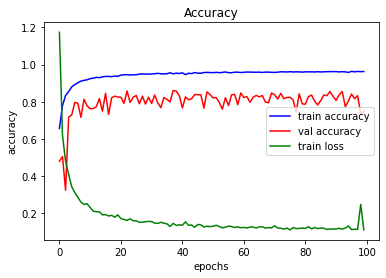

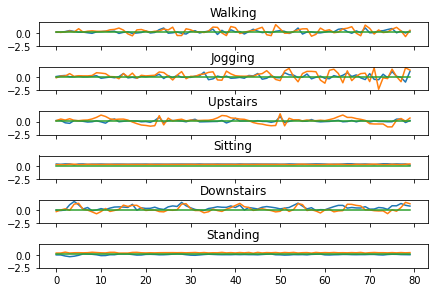

In [64]:
#39_03
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
'''
ref1(dataset): http://www.cis.fordham.edu/wisdm/dataset.php
ref2(paper): http://www.cis.fordham.edu/wisdm/includes/files/sensorKDD-2010.pdf
ref3:
https://towardsdatascience.com/human-activity-recognition-har-tutorial-with-keras-and-core-ml-part-1-8c05e365dfa0
ref4:
https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf
'''

#1
##gpus = tf.config.experimental.list_physical_devices('GPU')
##tf.config.experimental.set_memory_growth(gpus[0], True)

#2
def parse_end(s):
    try:
        return float(s[-1])
    except:
        return np.nan
 
def read_data(file_path):
# columns: 'user', 'activity', 'timestamp', 'x-accl', 'y-accl', 'z-accl';
    labels =     {'Walking'   :0,        
                  'Jogging'   :1,
                  'Upstairs'  :2,
                  'Sitting'    :3,
                  'Downstairs':4,
                  'Standing'   :5}    
    data = np.loadtxt(file_path, delimiter=",", usecols=(0,1, 3, 4, 5), # without timestamp
                      converters={1:lambda name: labels[name.decode()],
                                  5: parse_end})
    data = data[~np.isnan(data).any(axis=1)] # remove rows with np.nan
    return data

# Load data set containing all the data from csv
data = read_data("WISDM_ar_v1.1_raw.txt")
##print("user:",     np.unique(data[:,0])) # 36 users
##print("activity:", np.unique(data[:,1])) # 6 activity

#3: normalize x, y, z
mean = np.mean(data[:,2:], axis = 0)
std  = np.std(data[:,2:], axis = 0)
data[:,2:] = (data[:,2:]-mean)/std
##data[:,2:] = (data[:,2:])/np.max(data[:,2:], axis = 0) # [ -1, 1]
##print(np.mean(data[:, 2:], axis = 0)) # [0, 0, 0]
##print(np.std(data[:, 2:], axis = 0))  # [1, 1, 1]

# split data into x-train and x_test
x_train = data[data[:,0] <= 28] #[28, 36]
x_test  = data[data[:,0]  > 28]

#4: segment data and reshape (-1, TIME_PERIODS, 3)   
TIME_PERIODS  = 80  # length
STEP_DISTANCE = 40 # if STEP_DISTANCE = TIME_PERIODS, then no overlap
def data_segments(data):
    segments = []
    labels = []
    for i in range(0, len(data)-TIME_PERIODS,  STEP_DISTANCE):
        X = data[i:i+TIME_PERIODS, 2:].tolist() # x, y, z
        
        # label as the most activity in this segment    
        values, counts = np.unique(data[i:i+TIME_PERIODS, 1], return_counts=True)
        label = values[np.argmax(counts)] # from scipy import stats; stats.mode()
    
        segments.append(X)
        labels.append(label)
    
    # reshape (-1, TIME_PERIODS, 3)
    segments = np.array(segments, dtype= np.float32).reshape(-1, TIME_PERIODS, 3)
    labels   = np.asarray(labels)
    return segments, labels
	
x_train, y_train = data_segments(x_train) 	
x_test, y_test = data_segments(x_test)	
print("x_train.shape=", x_train.shape)
print("x_test.shape=",  x_test.shape)

# one-hot encoding  
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
##print("y_train=", y_train)
##print("y_test=", y_test)

#5: build a model with 1D CNN
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(TIME_PERIODS,3))) # shape=(80,3)
model.add(tf.keras.layers.Conv1D(filters=100,
                                 kernel_size=11, activation='relu'))
model.add(tf.keras.layers.MaxPool1D())
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv1D(filters=10, kernel_size=5, activation='relu'))
model.add(tf.keras.layers.MaxPool1D())
model.add(tf.keras.layers.Dropout( rate=0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=6, activation='softmax'))
model.summary()

#6: train and evaluate the model
opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=100, batch_size=400,
               validation_data = (x_test, y_test), verbose=2)  # validation_split=0.2
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

#7: plot accuracy and loss
plt.title("Accuracy")
plt.plot(ret.history['accuracy'],     "b-", label="train accuracy")
plt.plot(ret.history['val_accuracy'], "r-", label="val accuracy")
plt.plot(ret.history['loss'],         "g-", label="train loss")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="best")
plt.show()


#8: draw sample activity
activity = ('Walking','Jogging','Upstairs', 'Sitting','Downstairs','Standing')   
train_label  = np.argmax(y_train, axis = 1)

plot_data =[]
n = 1
for i in range(6):
    plot_data.append(np.where(train_label == i)[0][n]) # n-th data

fig, ax = plt.subplots(6, sharex=True,  sharey=True)
fig.tight_layout()
for i in range(6):
    k = plot_data[i]
    ax[i].plot(x_train[k], label=activity[i])
    ax[i].set_title(activity[i])
plt.show()


In [76]:
print(data)

[[33.          1.         -0.1982028   0.80414147  0.09547358]
 [33.          1.          0.63503976  0.59416915  0.09547358]
 [33.          1.          0.61913056  0.5376381   0.09547358]
 ...
 [19.          3.          1.2289481  -1.28007428  0.09547358]
 [19.          3.          1.21726766 -1.2919328   0.09547358]
 [19.          3.          1.199747   -1.2726627   0.09547358]]


In [ ]:
#40_01
import tensorflow as tf
import numpy as np

#1: 
gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu,True)
else:
    print("No GPU found")
#2: crate a 2D input data
A = np.array([[1, 2, 3, 4, 5],
              [4, 3, 2, 1, 0],
              [5, 6, 7, 8, 9],
              [4, 3, 2, 1, 0],
              [0, 1, 2, 3, 4]],dtype='float32')
A = A.reshape(-1, 5, 5, 1)  # (batch, rows, cols, channels)

#3: build a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(A.shape[1:])) # shape=(5, 5, 1)
model.add(tf.keras.layers.MaxPool2D())
##model.add(tf.keras.layers.MaxPool2D(padding='same'))
model.summary()

#4: apply A to model
B = model.predict(A)  # (batch, pooled_rows, pooled_cols, channels)
print("B=", B)


In [ ]:
#40_02
import tensorflow as tf
import numpy as np

#1: 
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

#2: crate a 2D input data
A = np.array([[1, 2, 3, 4, 5],
              [4, 3, 2, 1, 0],
              [5, 6, 7, 8, 9],
              [4, 3, 2, 1, 0],
              [0, 1, 2, 3, 4]],dtype='float32')
A = A.reshape(-1, 5, 5, 1) # (batch, rows, cols, channels)

#3: build a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(A.shape[1:])) # shape=(5, 5, 1)
model.add(tf.keras.layers.AveragePooling2D())
##model.add(tf.keras.layers.AveragePooling2D(padding='same'))
model.summary()

#4: apply A to model
B = model.predict(A) # (batch, pooled_rows, pooled_cols, channels)
print("B=", B)



In [ ]:
#40_03
import tensorflow as tf
import numpy as np

#1: 
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

#2: crate a 2D input data
A = np.array([[[1, 2, 3, 4, 5],  # 0-channel
               [4, 3, 2, 1, 0],
               [5, 6, 7, 8, 9],
               [4, 3, 2, 1, 0],
               [0, 1, 2, 3, 4]],
              [[1, 2, 3, 4, 5],  # 1-channel 
               [4, 3, 2, 1, 0],
               [5, 6, 7, 8, 9],
               [4, 3, 2, 1, 0],
               [0, 1, 2, 3, 4]]],  dtype='float32')

print("A.shape", A.shape)       # (2, 5, 5)
A1 = np.transpose(A, (1, 2, 0)) # (5, 5, 2)
A1 = np.expand_dims(A1, axis=0) # (1, 5, 5, 2) # (batch, rows, cols, channels)

#3: build a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(A1.shape[1:])) # shape=(5, 5, 2)

model.add(tf.keras.layers.MaxPool2D())
##model.add(tf.keras.layers.AveragePooling2D())
##model.add(tf.keras.layers.MaxPool2D(padding='same'))
##model.add(tf.keras.layers.AveragePooling2D(padding='same'))
model.summary()

#4: apply A1 to model
B = model.predict(A1) # (batch, pooled_rows, pooled_cols, channels)
##output = model(A1); B = output.numpy()
print("B.shape=", B.shape)
print("B[:,:,:,0]=", B[:,:,:,0]) # 0-channel
print("B[:,:,:,1]=", B[:,:,:,1]) # 1-channel


In [ ]:
#40_04
import tensorflow as tf
import numpy as np

#1: 
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

#2: crate a 2D input data with 2-channels
A = np.array([[[1, 2, 3, 4, 5],  # 0-channel
               [4, 3, 2, 1, 0],
               [5, 6, 7, 8, 9],
               [4, 3, 2, 1, 0],
               [0, 1, 2, 3, 4]],
              [[1, 2, 3, 4, 5],  # 1-channel 
               [4, 3, 2, 1, 0],
               [5, 6, 7, 8, 9],
               [4, 3, 2, 1, 0],
               [0, 1, 2, 3, 4]]],  dtype='float32')

print("A.shape", A.shape)       # (2, 5, 5)
A1 = np.transpose(A, (1, 2, 0)) # (5, 5, 2)
A1 = np.expand_dims(A1, axis=0) # (1, 5, 5, 2)

#3: build a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(A1.shape[1:])) # shape=(5, 5, 2)
model.add(tf.keras.layers.GlobalMaxPooling2D())
##model.add(tf.keras.layers.GlobalAveragePooling2D())
model.summary()

#4: apply A1 to model
B = model.predict(A1) # (batch, channels) = (1, 2)
##output = model(A1); B = output.numpy()
print("B=", B)


In [ ]:
#40_05
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

#1: 
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

#2
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
##print("x_train.shape=", x_train.shape) # (60000, 28, 28)
##print("x_test.shape=",  x_test.shape)  # (10000, 28, 28)

# expand data with channel = 1
x_train = np.expand_dims(x_train,axis=3) # (60000, 28, 28, 1)
x_test  = np.expand_dims(x_test, axis=3) # (10000, 28, 28, 1)

#3: build a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(x_train.shape[1:])) # shape=(28, 28, 1)
model.add(tf.keras.layers.MaxPool2D())
##model.add(tf.keras.layers.AveragePooling2D())
model.summary()

#4: apply x_train to model
output = model.predict(x_train[:8]) #(batch, pooled_rows, pooled_cols, channels)
img = output[:,:,:,0] # 0-filter
##img = np.squeeze(output.numpy(), axis = 3) # remove filters-axis
print("img.shape=", img.shape)

#5: display images
fig = plt.figure(figsize=(8, 4))
for i in range(8):   
    plt.subplot(2, 4, i + 1)  
    plt.imshow(img[i], cmap='gray')
    plt.axis("off")
fig.tight_layout()
plt.show()


In [ ]:
#40_06
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

#1: 
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

#2
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
##print("x_train.shape=", x_train.shape) # (50000, 32, 32, 3)
##print("x_test.shape=",  x_test.shape)  # (10000, 32, 32, 3)

#3: build a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(x_train.shape[1:])) # shape=(32, 32, 3)
##model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.AveragePooling2D())
model.summary()

#4: apply x_train to model
output = model.predict(x_train[:8]) #(batch, pooled_rows, pooled_cols, channels)
img = output/255   # output.astype('uint8')
print("img.shape=", img.shape)

#5: display images
fig = plt.figure(figsize=(8, 4))
for i in range(8):   
    plt.subplot(2, 4, i + 1)  
    plt.imshow(img[i])
    plt.axis("off")
fig.tight_layout()
plt.show()


In [ ]:
#41_01
import tensorflow as tf
import numpy as np

#1: 
#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)
#if gpus:
#    for gpu in gpus:
#        tf.config.experimental.set_memory_growth(gpu, True)
#else:
#    print("No GPU found")

#2: crate a 2D input data
A = np.array([[1, 2, 3, 4, 5],
              [4, 3, 2, 1, 0],
              [5, 6, 7, 8, 9],
              [4, 3, 2, 1, 0],
              [0, 1, 2, 3, 4]],dtype='float32')
A = A.reshape(-1, 5, 5, 1)

PADDING  =  'valid' #  'same'

#3: build a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(A.shape[1:])) # shape=(5, 5, 1)
model.add(tf.keras.layers.Conv2D(filters=1,
                                 kernel_size = (2, 2),
                                 strides= (2, 2),
                                 padding= PADDING,
                                 use_bias=False,
                                 kernel_initializer=tf.constant_initializer(1/4),
                                 input_shape=A.shape[1:])) # (5, 5, 1)
model.summary()

#4: apply A to model
B = model.predict(A)  # (batch, new_rows, new_cols, filters)
##output = model(A); B = output.numpy()
print("B=", B)

#5: weights
W = model.trainable_variables[0] # (kernel_size[0], kernel_size[1], channels, filters)
print("W.shape=", W.shape)
print("W[:, :, 0, 0]=", W[:, :, 0, 0])


In [ ]:
#41_02
import tensorflow as tf
import numpy as np

#1: 
#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)

#2: crate a 2D input data
A = np.array([[[1, 2, 3, 4, 5],  # 0-channel
               [4, 3, 2, 1, 0],
               [5, 6, 7, 8, 9],
               [4, 3, 2, 1, 0],
               [0, 1, 2, 3, 4]],
              [[1, 2, 3, 4, 5],  # 1-channel 
               [4, 3, 2, 1, 0],
               [5, 6, 7, 8, 9],
               [4, 3, 2, 1, 0],
               [0, 1, 2, 3, 4]]],  dtype='float32')

##print("A.shape", A.shape)       # (2, 5, 5)
A1 = np.transpose(A, (1, 2, 0)) # (5, 5, 2)
A1 = np.expand_dims(A1, axis=0) # (1, 5, 5, 2)

PADDING  = 'valid'   # 'same'

#3: build a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(A1.shape[1:])) # shape=(5, 5, 2)
model.add(tf.keras.layers.Conv2D(filters=1,
                                 kernel_size = (2, 2),
                                 strides= (2, 2),
                                 padding= PADDING,
                                 use_bias=False,
                                 kernel_initializer=tf.constant_initializer(1/4),
                                 input_shape=A.shape[1:])) # (5, 5, 2)
model.summary()

#4: apply A to model
B = model.predict(A1)  # (batch, new_rows, new_cols, filters)
##output = model(A1);B = output.numpy()
print("B=", B)

#5: weights
W = model.trainable_variables[0] # (kernel_size[0], kernel_size[1], channels, filters)
print("W.shape=", W.shape)
##print("W[:,:,0,0]=", W[:,:,0,0]) # 0-channel, 0-filter
##print("W[:,:,0,0]=", W[:,:,1,0]) # 1-channel, 0-filter


In [ ]:
#41_03
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

#1: 
#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)

#2
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

# expand data with channel = 1
x_train = np.expand_dims(x_train,axis=3) # (60000, 28, 28, 1)
x_test  = np.expand_dims(x_test, axis=3) # (10000, 28, 28, 1)

#3: weighted average kernel initial values, shape: (3, 3)
W = np.array([[1/16, 2/16, 1/16],      
              [2/16, 4/16, 2/16],
              [1/16, 2/16, 1/16]], dtype='float32')
W = W.reshape(3, 3, 1, 1) # (kernel_size[0], kernel_size[1], channels, filters)
##W = np.expand_dims(W, axis=2)  # (3, 3, 1)
##W = np.expand_dims(W, axis=3)  # (3, 3, 1, 1)

#4: build a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(x_train.shape[1:])) # shape=(28, 28, 1)
model.add(tf.keras.layers.Conv2D(filters=1,
                                 kernel_size = W.shape[:2], # (3, 3)
                                 use_bias=False,
                                 kernel_initializer=tf.constant_initializer(W)))
model.summary()

#5: apply x_train to model
output = model.predict(x_train[:8]) #(batch, new_rows, new_cols, filters)
img = output[:,:,:,0] # 0-filter
print("img.shape=", img.shape)

#6: display images
fig = plt.figure(figsize=(8, 4))
for i in range(8):   
    plt.subplot(2, 4, i + 1)  
    plt.imshow(img[i], cmap='gray')
    plt.axis("off")
fig.tight_layout()
plt.show()

#7: weights
W2 = model.trainable_variables[0] # (kernel_size[0], kernel_size[1], channels, filters)
print("W2.shape=", W2.shape)
print("W2[:,:,0,0]=", W2[:,:,0,0]) # 0-channel, 0-filter


In [ ]:
#41_04
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

#1: 
#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)

#2
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

# expand data with channel = 1
x_train = np.expand_dims(x_train,axis=3) # (60000, 28, 28, 1)
x_test  = np.expand_dims(x_test, axis=3) # (10000, 28, 28, 1)

#3: Sobel kernel initial values, shape: (2, 3, 3)
W = np.array([[[-1, 0, 1],      
               [-2, 0, 2],
               [-1, 0, 1]],
              [[-1,-2,-1],      
               [ 0, 0, 0],
               [ 1, 2, 1]]], dtype='float32')
W = np.transpose(W, (1, 2, 0)) # (3, 3, 2)
W=np.expand_dims(W, axis=2) #(3,3,1,2)=(kernel_size[0],kernel_size[1],channels, filters)

#4: build a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(x_train.shape[1:])) # shape=(28, 28, 1)
model.add(tf.keras.layers.Conv2D(filters=2,
                                 kernel_size = W.shape[:2], # (3, 3)
                                 use_bias=False,
                                 kernel_initializer=tf.constant_initializer(W)))
model.summary()

#5: apply x_train to model
##output = model.predict(x_train[:8])
output = model(x_train[:8]) # (batch, new_rows, new_cols, filters)
mag = tf.sqrt(tf.square(output[:,:,:,0])+tf.square(output[:,:,:,1]))
max_mag = tf.reduce_max(mag)  # tf.norm(mag, np.inf)
mag = tf.divide(mag, max_mag) # range[ 0, 1]
img = mag.numpy()
print("img.shape=", img.shape)

#6: display images
fig = plt.figure(figsize=(8, 4))
for i in range(8):   
    plt.subplot(2, 4, i + 1)  
    plt.imshow(img[i], cmap='gray')
    plt.axis("off")
fig.tight_layout()
plt.show()

#6: weights
W2 = model.trainable_variables[0] # (kernel_size[0], kernel_size[1], channels, filters)
print("W2.shape=", W2.shape)
print("W2[:,:,0,0]=", W2[:,:,0,0]) # 0-channel, 0-filter
print("W2[:,:,0,1]=", W2[:,:,0,1]) # 0-channel, 1-filter


In [ ]:
#41_05
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

#1: 
#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)

#2
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
##print("x_train.shape=", x_train.shape) # (50000, 32, 32, 3)
##print("x_test.shape=",  x_test.shape)  # (10000, 32, 32, 3)

W = np.array([[[-1, 0, 1],      
               [-2, 0, 2],
               [-1, 0, 1]],
              [[-1,-2,-1],      
               [ 0, 0, 0],
               [ 1, 2, 1]]], dtype='float32')


#3: convert W.shape=(2, 3, 3) to (kernel_size[0], kernel_size[1], channels, filters)
W = np.transpose(W, (1, 2, 0)) # (3, 3, 2)
W = np.expand_dims(W, axis=2)  # (3, 3, 1, 2)
W = np.concatenate((W, W, W), axis= 2) # (3, 3, 3, 2) # channels=3, filters = 2

#4: build a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(x_train.shape[1:])) # shape=(32, 32, 3)
model.add(tf.keras.layers.Conv2D(filters=2,
                                 kernel_size = W.shape[:2], # (3, 3)
##                                 dilation_rate=(2,2),
##                                 padding='same',
                                 use_bias=False,
                                 kernel_initializer=tf.constant_initializer(W))) 
model.summary()

#5: apply x_train to model
##output = model.predict(x_train[:8])
output = model(x_train[:8]) # (batch, new_rows, new_cols, filters)
gx = output[:,:,:,0]
gy = output[:,:,:,1]
mag = tf.sqrt(tf.square(gx)+tf.square(gy))
max_mag = tf.reduce_max(mag)  # tf.norm(mag, np.inf)
mag = tf.divide(mag, max_mag) # range[ 0, 1]
img = mag.numpy()
print("img.shape=", img.shape)

#6: display images
fig = plt.figure(figsize=(8, 4))
for i in range(8):   
    plt.subplot(2, 4, i + 1)  
    plt.imshow(img[i], cmap='gray')
    plt.axis("off")
fig.tight_layout()
plt.show()

#7: weights
W2 = model.trainable_variables[0] # (kernel_size[0], kernel_size[1], channels, filters)
print("W2.shape=", W2.shape)
print("0-filter: gx")
print("W2[:,:,0,0]=", W2[:,:,0,0]) # 0-channel, 0-filter
print("W2[:,:,1,0]=", W2[:,:,1,0]) # 1-channel, 0-filter
print("W2[:,:,2,0]=", W2[:,:,2,0]) # 2-channel, 0-filter

print("1-filter: gy")
print("W2[:,:,0,1]=", W2[:,:,0,1]) # 0-channel, 1-filter
print("W2[:,:,1,1]=", W2[:,:,1,1]) # 1-channel, 1-filter
print("W2[:,:,2,1]=", W2[:,:,2,1]) # 2-channel, 1-filter


In [ ]:
#42_01
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers   import Input, Conv2D, MaxPool2D, Dense  
from tensorflow.keras.layers   import BatchNormalization, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt

#1: 
##gpus = tf.config.experimental.list_physical_devices('GPU')
##tf.config.experimental.set_memory_growth(gpus[0], True)

#2
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255.0 # [0.0, 1.0]
x_test  /= 255.0

# expand data with channel = 1
x_train = np.expand_dims(x_train,axis=3) # (60000, 28, 28, 1)
x_test  = np.expand_dims(x_test, axis=3) # (10000, 28, 28, 1)

# one-hot encoding 
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

#3: build a model
model = tf.keras.Sequential()
model.add(Input(x_train.shape[1:])) # shape=(28, 28, 1)
model.add(Conv2D(filters=16, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout( rate=0.2))

model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))
model.summary()

#4: train and evaluate the model
opt = RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=100, batch_size=400, 
                validation_data = (x_test, y_test), verbose=0)
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

#5: plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
fig.tight_layout()
ax[0].plot(ret.history['loss'],  "g-")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'],     "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
plt.show()


In [ ]:
#42_02
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers   import Input, Conv2D, MaxPool2D, Dense  
from tensorflow.keras.layers   import BatchNormalization, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt

#1: 
##gpus = tf.config.experimental.list_physical_devices('GPU')
##tf.config.experimental.set_memory_growth(gpus[0], True)

#2
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255.0 # [0.0, 1.0]
x_test  /= 255.0

# expand data with channel = 1
x_train = np.expand_dims(x_train,axis=3) # (60000, 28, 28, 1)
x_test  = np.expand_dims(x_test, axis=3) # (10000, 28, 28, 1)

# one-hot encoding 
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

#3: build a sequential model
model = tf.keras.Sequential()
model.add(Input(x_train.shape[1:])) # shape=(28, 28, 1)
model.add(Conv2D(filters=16, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout( rate=0.2))

model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))
##model.summary()

#4: train and evaluate the model
opt = RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=100, batch_size=400, 
               validation_data = (x_test, y_test), verbose=0)

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

#5: plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
fig.tight_layout()
ax[0].plot(ret.history['loss'],  "g-")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'],     "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
plt.show()


In [ ]:
#42_03
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers   import Input, Conv2D, MaxPool2D, Dense  
from tensorflow.keras.layers   import BatchNormalization, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt

#1: 
##gpus = tf.config.experimental.list_physical_devices('GPU')
##tf.config.experimental.set_memory_growth(gpus[0], True)

#2
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') # (50000, 32, 32, 3)
x_test  = x_test.astype('float32')  # (10000, 32, 32, 3)

# one-hot encoding 
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

#3:
def normalize_image(image): # 3-channel
    mean=  np.mean(image, axis = (0, 1, 2))
    std =   np.std(image, axis  = (0, 1, 2))
    image = (image-mean)/std
    return image
x_train= normalize_image(x_train) # range: N(mean, std]
x_test = normalize_image(x_test)

#4: build a sequential model
model = tf.keras.Sequential()
model.add(Input(x_train.shape[1:])) # shape=(32, 32, 1)
model.add(Conv2D(filters=16, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout( rate=0.2))

model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))
model.summary()

#5: train and evaluate the model
opt = RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=100, batch_size=400,
               validation_data = (x_test, y_test), verbose=0)
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

#6: plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].plot(ret.history['loss'],  "g-")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'],     "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
fig.tight_layout()
plt.show()


In [ ]:
#42_04
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.layers   import Input, Conv2D, MaxPool2D, Dense  
from tensorflow.keras.layers   import BatchNormalization, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt

#1: 
##gpus = tf.config.experimental.list_physical_devices('GPU')
##tf.config.experimental.set_memory_growth(gpus[0], True)

#2
(x_train, y_train), (x_test, y_test) = cifar100.load_data() # 'fine'
x_train = x_train.astype('float32') # (50000, 32, 32, 3)
x_test  = x_test.astype('float32')  # (10000, 32, 32, 3)

# one-hot encoding 
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

#3:
def normalize_image(image): # 3-channel
    mean=  np.mean(image, axis = (0, 1, 2))
    std =  np.std(image, axis = (0, 1, 2))
    image = (image-mean)/std
    return image
x_train= normalize_image(x_train) # range: N(mean,std]
x_test = normalize_image(x_test)

#4: build a model
model = tf.keras.Sequential()
model.add(Input(shape=x_train.shape[1:])) #  shape=(32, 32, 3)

model.add(Conv2D(filters=16, kernel_size = (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')) 
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(rate=0.5))

model.add(Flatten())
model.add(Dense(units=100, activation='softmax')) # 100 classes 
model.summary()
 
#5: train and evaluate the model
opt = RMSprop(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=200, batch_size=400,
                validation_data = (x_test, y_test), verbose=0)
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

#6: plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10,6))
ax[0].plot(ret.history['loss'],  "g-") #, label="train loss")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'],     "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
fig.tight_layout()
plt.show()
